# Linear Regression Project

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Dataset Overview](#section2)<br/>
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
4. [Exploratory Data Analysis](#section4)
5. [Questions](#section5)
    - 5.1 [How does the amount a customer spends per year correlate to the time they spend on the website?](#section501)<br/>
    - 5.2 [How does the amount a customer spends per year correlate to the time they spend on the mobile app?](#section502)<br/>
    - 5.3 [How does the average amount of time a customer spends on the mobile application correlate to the length of their membership?](#section503)<br/>
    - 5.4 [How does the average amount of time a customer spends on the website correlate to the length of their membership?](#section504)<br/>
    - 5.5 [How does the average session length of a customer correlate to the amount that they spend in a year?](#section505)<br/>
    - 5.6 [How does the length of membership influence the amount spent per year?](#section506)<br/>
6. [Training and Testing Data](#section6)<br/>
    - 6.1 [Training the model](#section601)<br/>
    - 6.2 [Predicting Test Data](#section602)<br/>
    - 6.3 [Evaluating the Model](#section603)<br/>
    - 6.4 [Examining the Residuals](#section604)<br/>
    - 6.5 [Analyzing our Coefficients](#section605)<br/>
7. [Conclusion](#section7)<br/>

<a id='section1'></a>
## 1. Problem Statement:

The following dataset is representative of an e-commerce company that sells clothing online but also has in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a moobile app or website for the clothes that they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Using the dataset, explore the possibilities the company has and what courses of action could help them make the decision.

<a id='section2'></a>
## 2. Dataset Overview:

- This dataset consists of customer information and behavior. Using this data, we will attempt to answer the problem statement while exploring underlying patterns in the data. We will implement a linear regression model to then predict returns of investing either in the app or website.

- The dataset is quite small in size and comprises of only __500 observations of 7 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Email           |Customers email ID                                                 | 
| Address      | Address of Customer                        |  
| Avatar        | Customer Avatar                                           | 
| Avg. Session Length          | Average session of in-store style advice sessions.                                        |   
| Time on App           | Average time spent on App in minutes                                          |
| Time on Website           | Average time spent on Website in minutes                                       |
| Length of Membership         | How many years the customer has been a member.  |

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split            # Used to split our data into test and train sets

In [4]:
from sklearn.linear_model import LinearRegression               # Used to create an instance of our linear regression model and train it

In [5]:
from sklearn import metrics                                    # Allows us to evalute our model based on metrics such as MSE and RMSE

### Importing the dataset

In [6]:
df = pd.read_csv('Ecommerce Customers')

<a id='section3'></a>
## 3. Data Profiling:

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Once we identify if there are any inconsistencies and shortcomings of the data, we will begin preprocessing it.
- In __preprocessing__ we will deal with erronous and missing values of columns. If necessary, we may also add columns to make analysis easier.

<a id='section301'></a>
### 3.1 Understanding the Dataset

In [7]:
df.shape

(500, 8)

In [8]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
df.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,jacksonking@mccormick.com,"76666 Kathy Locks\nPort Susan, ME 64335",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [12]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

As we can see, the data does not contain any null values nor missing values. Due to this, we can continue on to explore the data and find its underlying patterns.

<a id='section4'></a>
## 4. Exploratory Data Analysis:

**Let's explore the data!**

For the rest of the notebook, we'll only be using the numerical data of the csv file as we are trying to implement linear regression for our problem statement.


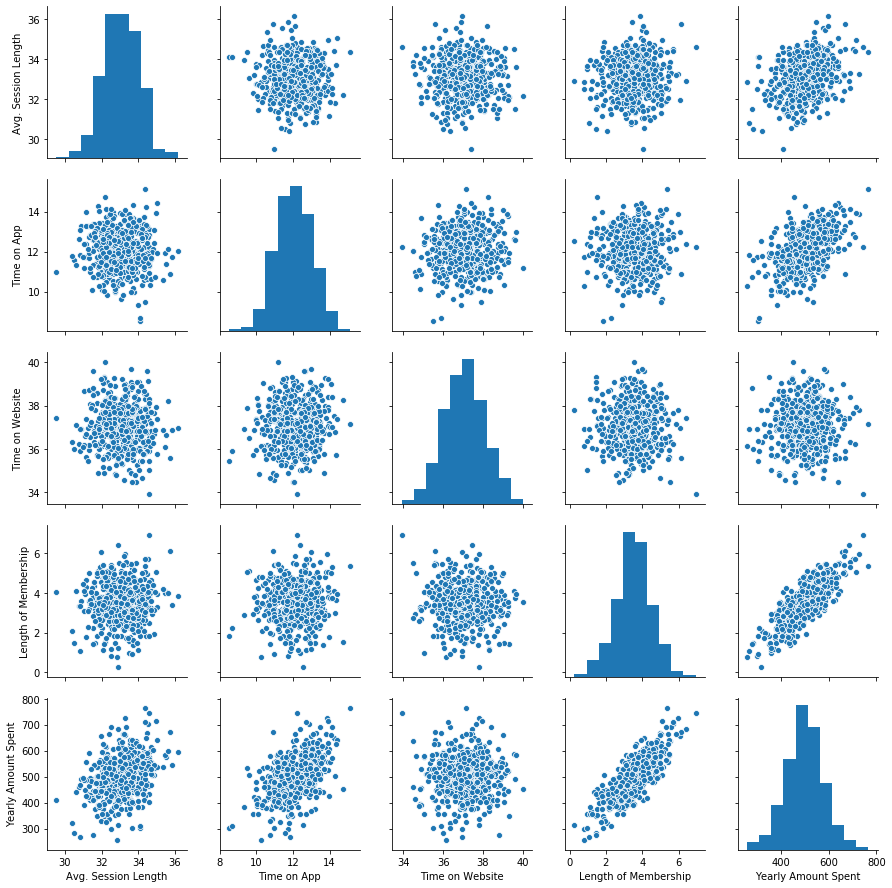

In [13]:
sns.pairplot(data=df)

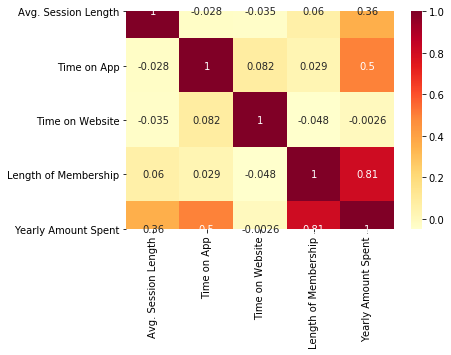

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')

- We run a pairplot to get a quick overview of the relationships between the columns. 
- To find out how our columns are correlated, we also use a heatmap. 
- Now that we are aware of the relationships between columns and the degree to which they are correlated, we can begin to explore them in more depth.

<a id='section5'></a>
## 5. Questions:

<a id='section501'></a>
### 5.1 How does the amount a customer spends per year correlate to the time they spend on the website?

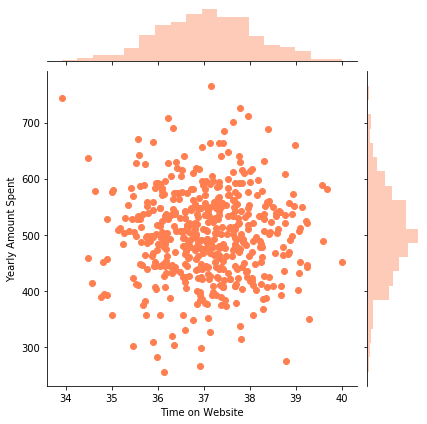

In [15]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent', data=df,color='coral',)

From the above jointplot, we can see that 'Time on Website' and 'Yearly amount Spent' are __weakly__ correlated.

<a id='section502'></a>
### 5.2 How does the amount a customer spends per year correlate to the time they spend on the mobile app?

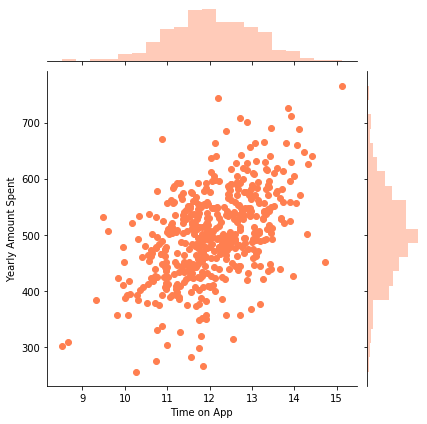

In [16]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data=df, color='coral')

From the above jointplot, we can see that there seems to be a __positive correlation__ between the amount a customer spends per year and their time on the mobile app. As the customer spends more time using the app, the amount they spend per year increases as well.

<a id='section503'></a>
### 5.3 How does the average amount of time a customer spends on the mobile application correlate to the length of their membership?

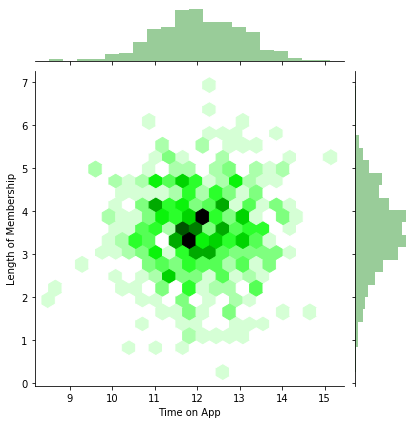

In [28]:
sns.jointplot(x='Time on App',y='Length of Membership', data=df, kind='hex', color='green')

<a id='section504'></a>
### 5.4 How does the average amount of time a customer spends on the website correlate to the length of their membership?

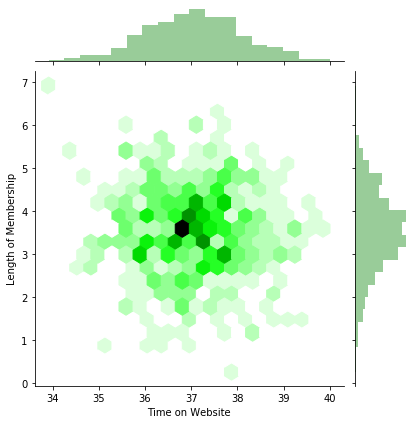

In [30]:
sns.jointplot(x='Time on Website',y='Length of Membership', data=df, kind='hex', color='green')

From both __5.3__ and __5.4__, we can see that there doesn't seem to be a strong correlation between length of membership and the average time a customer spends on either the mobile application or the website.

<a id='section505'></a>
### 5.5 How does the average session length of a customer correlate to the amount that they spend in a year?

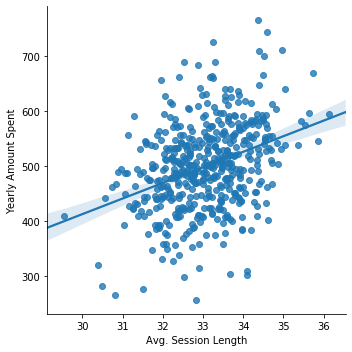

In [26]:
sns.lmplot(x='Avg. Session Length',y='Yearly Amount Spent', data=df)

From our lmplot above, we can see that there is a __slightly positive__ correlation between session length and yearly expenditure. This means that the longer a session is, the more likely it is that a customer will spend more that year.

<a id='section506'></a>
### 5.6 How does the length of membership influence the amount spent per year?

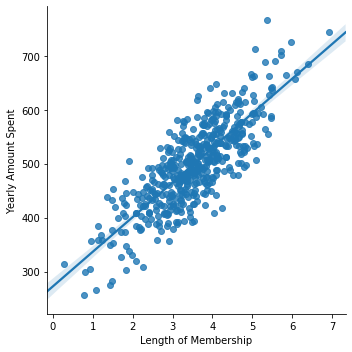

In [30]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

The above plot shows us that there is a __strong positive__ correlation between the yearly amount spent and the length of the membership of the customer. This means that customers that have been long time members are more likely to provide the company higher returns than those that have not.

<a id='section6'></a>
## 6. Training and Testing Data:

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. Our target variable will be the __Yearly Amount Spent__ column and the other numerical columns will serve as our independent variables.

In [24]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [28]:
X = df[['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']]
Y = df['Yearly Amount Spent']

We have now created two separate dataframes. __X__ contains all the columns we will be using to predict our target variable. __Y__ is a dataframe that consists of the values of our target variable, namely, 'Yearly Amount Spent.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=101)

In the above code snippet, we split our dataset into training and testing sets. We have used a __70-30__ split of train and test data. This means that 70% of our records will be used to train our linear regression model and the remaining 30% will be used to test our model.

<a id='section601'></a>
### 6.1 Training the Model

Now its time to train our model on our training data!

In [32]:
lm = LinearRegression()             # Creating an instance of our Linear Regression Model

**Training/Fitting our model on the training data**

In [33]:
lm.fit(X_train,y_train)             # Training/Fitting our model on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Printing out the coefficients of the model**

In [35]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

These coefficient values represent the mean change in the response given a __one unit__ change in the predictor

<a id='section602'></a>
### 6.2 Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [37]:
test_Values = lm.predict(X_test)

**To see how good a job our model has done of prediction, we will plot the predicted values __(test_Values)__ to the actual values __(y_test)__. In this way we can compare these to see how close they are to eachother**

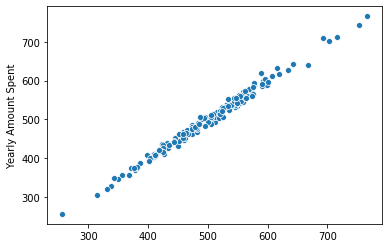

In [38]:
sns.scatterplot(x=test_Values,y=y_test)

As we can see from the above scatter plot, our plot is __relatively linear__ in nature. This indicates that our model has done a pretty job of predicting our target values. The __more linear__ our graph, the better indication we have that our model has made accurate predictions.

<a id='section603'></a>
### 6.3 Evaluating the Model

- Now let's evaluate our model's performance by calculating the residual sum of squares and the explained variance score (R^2).
- Below we have calculated common metrics used to evaluate our linear regression model such as mean absolute error, mean squared error and root mean squared error.

In [45]:
print('MAE :',metrics.mean_absolute_error(y_test,test_Values))
print('MSE :',metrics.mean_squared_error(y_test,test_Values))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,test_Values)))

MAE : 7.228148653430835
MSE : 79.81305165097443
RMSE : 8.933815066978633


<a id='section604'></a>
### 6.4 Examinnig the Residuals

Now that we have an idea about how good a fit our model was, let's quickly explore the residuals.

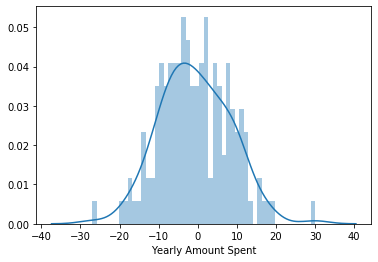

In [50]:
sns.distplot(y_test-test_Values,bins=50)

We can see that our residuals follow a normal distribution for the most part. This means that the majority of our residuals lie close to 0.

<a id='section605'></a>
### 6.5 Analyzing our Coefficients

We still want to figure out the answer to the original question, does the company focus it's efforts on the mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [51]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

<a id='section7'></a>
## 7. Conclusion:

**Should the company should focus more on their mobile app or on their website?**

This question can be answered in multiple ways. From what we have seen above, the company sees a higher returns per unit increase of __'Time on App'__ as compared to __'Time on Website'__. We were also able to see that the length of memberships is strongly positively correlated to the total amount spent per year.

Knowing this, we can provide insights to the company and suggest different actions they could take:

**Option 1 :** The company can invest in __developing the website__ so that it can catch up to the performance of the mobile application. From our data we know that customers on average spend more time on the website than they do on the mobile application so this could increase their returns.

**Option 2 :** The company can put their efforts into __developing the mobile app__ further since that is what is currently working better for them. This could be a less risky method of increasing their returns. The company should also consider that users are spending less time on the mobile applcation as compared to the website. Driving traffic to the mobile application for longer periods of time, could lead to increased returns. 

We should also consider the __'Length of Membership'__ column. We can see that it is highly positively correlated with the __'Yearly Amount Spent'__. This means that retaining customers is also an important factor in the company being able to better their returns.

Lastly, the __'Average Session Length'__ a customer also plays a role in how much the customer spends on a yearly basis. Taking this into consideration, the company could also focus efforts into the in-store service they provide.